(2062, 128, 128)
3
[0.29010149 4.51188075 6.60700459 5.55744314]
[0.86176739 0.05540927 0.03783863 0.04498472]
[0.25 0.25 0.25 0.25]


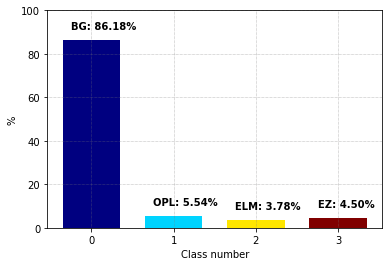

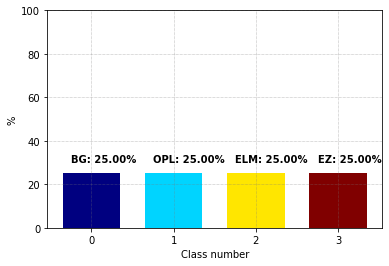

In [33]:
import os
import numpy as np
import albumentations as T
import matplotlib.pyplot as plt
from PIL import Image
from sklearn.utils import class_weight
from mycolorpy import colorlist as mcp

def get_filenames(path, ext):
    X0 = []
    for i in sorted(os.listdir(path)):
        if i.endswith(ext):
            X0.append(os.path.join(path, i))
    return X0

def main():
    path = "../dataset/new_128_3C/train_masks/"
    filenames = get_filenames(path, 'tiff')
    images = []
    for file in filenames:
        img = np.array(Image.open(file))

        images.append(img)

    print(np.array(images).shape)
    
    array = np.reshape(np.array(images), (np.array(images).shape[0]*np.array(images).shape[1]*np.array(images).shape[2]))
    print(np.max(array))
    color1=mcp.gen_color(cmap="jet",n=4)
    plt.figure()
    hist, bin_edges, patches = plt.hist(array, bins=[0, 1, 2, 3, 4], density=True, width=1)  # arguments are passed to np.histogram
    plt.close()
    plt.figure()
    classes = ['BG: ', 'OPL: ', 'ELM: ', 'EZ: ']
    for i in range(hist.shape[0]):
        plt.bar(i, hist[i]*100, color=color1[i], width=0.7)
        plt.text(i - 0.25, hist[i]*100 + 5, classes[i] + f'{hist[i]*100:0.2f}%', fontweight='bold')
        plt.ylim([0, 100])
        plt.xlabel('Class number')
        plt.ylabel('%')
        plt.xticks(range(0,4))
        plt.grid('on', color='#7a7878', linestyle=':', linewidth=0.5)
    plt.show
    class_weights = class_weight.compute_class_weight('balanced', classes=[0, 1, 2, 3], y=array)
    print(class_weights)
    print(hist)
    weight_classes = class_weights * hist
    print(weight_classes)
    
    plt.figure()
    for i in range(weight_classes.shape[0]):
        plt.bar(i, weight_classes[i]*100, color=color1[i], width=0.7)
        plt.text(i - 0.25, weight_classes[i]*100 + 5, classes[i] + f'{weight_classes[i]*100:0.2f}%', fontweight='bold')
        plt.ylim([0, 100])
        plt.xlabel('Class number')
        plt.ylabel('%')
        plt.xticks(range(0,4))
        plt.grid('on', color='#7a7878', linestyle=':', linewidth=0.5)
    plt.show

if __name__ == '__main__':
    main()